In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car_price.csv')
df.head()

,Unnamed: 0,name,Year,selling_price,km_driven,fuel,transmission,owner,State,Company
0,0,Hyundai Elite,2015,"5,80,000","41,831",Petrol,Manual,2nd Owner,Bangalore,Hyundai
1,1,Hyundai i10,2013,"3,15,000","98,078",Petrol,Manual,2nd Owner,Bangalore,Hyundai
2,2,Renault Kwid,2017,"4,20,000","20,002",Petrol,Automatic,1st Owner,Bangalore,Renault
3,3,Hyundai i10,2012,"3,22,000","76,807",Petrol,Manual,1st Owner,Bangalore,Hyundai
4,4,Honda City,2015,"7,26,000","57,094",Petrol,Manual,1st Owner,Bangalore,Honda


In [3]:
df.drop(columns='Unnamed: 0',inplace = True)

In [4]:
df.shape

(5963, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5963 entries, 0 to 5962
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           5963 non-null   object
 1   Year           5963 non-null   int64 
 2   selling_price  5963 non-null   object
 3   km_driven      5963 non-null   object
 4   fuel           5963 non-null   object
 5   transmission   5430 non-null   object
 6   owner          5963 non-null   object
 7   State          5963 non-null   object
 8   Company        5963 non-null   object
dtypes: int64(1), object(8)
memory usage: 465.9+ KB


### We can see all features are having object datatype

In [6]:
df.columns

Index(['name', 'Year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'State', 'Company'],
      dtype='object')

### Checking Null values


In [7]:
df.isna().sum()

name               0
Year               0
selling_price      0
km_driven          0
fuel               0
transmission     533
owner              0
State              0
Company            0
dtype: int64

<AxesSubplot:>

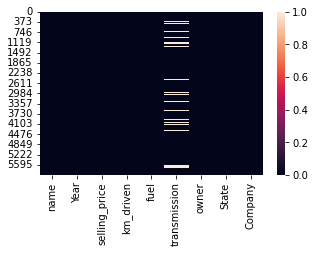

In [17]:
# visualising null values in dataset
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())


### We can see,transmission is havinig some null values.


### Filling Null Values


In [18]:
df['transmission']= df['transmission'].fillna(df['transmission'].mode()[0])

In [19]:
df.isna().sum()

name             0
Year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
State            0
Company          0
dtype: int64

### Checking Unique values


In [8]:
df.nunique()

name              100
Year               14
selling_price    1010
km_driven        2395
fuel                4
transmission        3
owner               3
State               5
Company            19
dtype: int64

### We can see, columns are containing multiple unique values.


In [9]:
df.head()

,name,Year,selling_price,km_driven,fuel,transmission,owner,State,Company
0,Hyundai Elite,2015,"5,80,000","41,831",Petrol,Manual,2nd Owner,Bangalore,Hyundai
1,Hyundai i10,2013,"3,15,000","98,078",Petrol,Manual,2nd Owner,Bangalore,Hyundai
2,Renault Kwid,2017,"4,20,000","20,002",Petrol,Automatic,1st Owner,Bangalore,Renault
3,Hyundai i10,2012,"3,22,000","76,807",Petrol,Manual,1st Owner,Bangalore,Hyundai
4,Honda City,2015,"7,26,000","57,094",Petrol,Manual,1st Owner,Bangalore,Honda


In [10]:
df['selling_price'] = df['selling_price'].str.replace(',','')


In [11]:
df['selling_price'] = df['selling_price'].astype(float)


In [13]:
df['km_driven'] = df['km_driven'].str.replace(',','')
df['km_driven'] = df['km_driven'].astype(int)

In [62]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'MAnual'], dtype=object)

In [63]:
df['transmission']=df['transmission'].replace('MAnual','Manual')

In [64]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df.dtypes

name              object
Year               int64
selling_price    float64
km_driven          int32
fuel              object
transmission      object
owner             object
State             object
Company           object
dtype: object

## Dataset Description


In [20]:
df.describe()

,Year,selling_price,km_driven
count,5963.000000,5.963000e+03,5963.000000
mean,2017.701493,6.726721e+05,40666.471575
std,2.702287,3.292737e+05,23872.065481
min,2009.000000,1.480000e+05,0.000000
25%,2016.000000,4.540000e+05,21698.000000
50%,2018.000000,5.940000e+05,36349.000000
75%,2020.000000,8.160000e+05,57251.000000
max,2022.000000,2.730000e+06,100530.000000


### Big difference between max value and 75% in km_driven indicates presence of outliers.


## Univariate Analysis


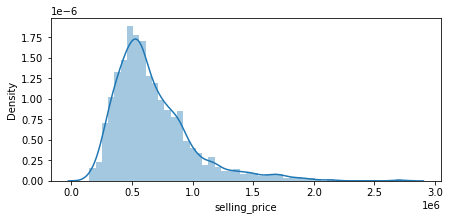

In [22]:
plt.figure(figsize=(7,3))
sns.distplot(df["selling_price"])
plt.show()

### We can see selling price is look like that data has normaly distributed.


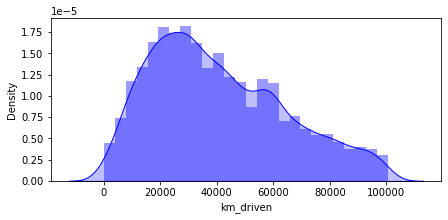

In [23]:
plt.figure(figsize=(7,3))
sns.distplot(df["km_driven"],color="b",kde_kws={"shade": True},)
plt.show()

### We can see, km driven has normally distributed but maximum data lies in the range of 0 to 100000 km.


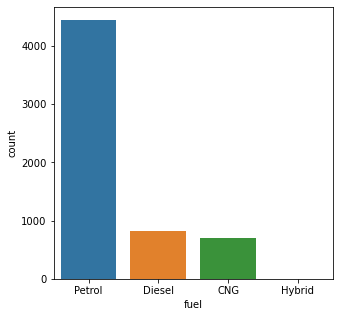

Petrol    4444
Diesel     825
CNG        693
Hybrid       1
Name: fuel, dtype: int64


In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='fuel',data=df)
plt.show()
print(df['fuel'].value_counts())

### We can see, Fuel as petrol has maximum count followed by Diesel. It means that maximum people are used petrol vehicle than others. But petrol vehicle are more expensive than others.


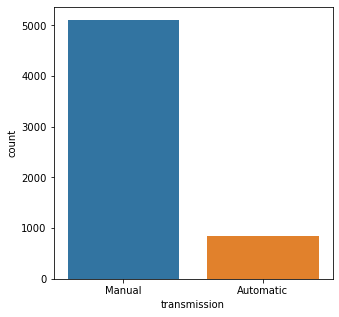

Manual       5109
Automatic     854
Name: transmission, dtype: int64


In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x='transmission',data=df)
plt.show()
print(df['transmission'].value_counts())

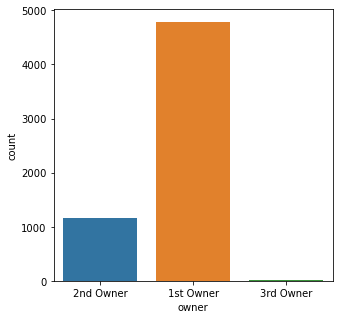

1st Owner    4787
2nd Owner    1156
3rd Owner      20
Name: owner, dtype: int64


In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='owner',data=df)
plt.show()
print(df['owner'].value_counts())

### We can see, Ist Owner owned vehicle are highest for selling followed by 2nd Owner.It simple because 1st owner vehicle are having more selling than others.


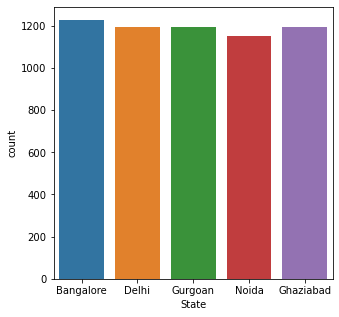

Bangalore    1228
Delhi        1196
Ghaziabad    1196
Gurgoan      1193
Noida        1150
Name: State, dtype: int64


In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x='State',data=df)
plt.show()
print(df['State'].value_counts())

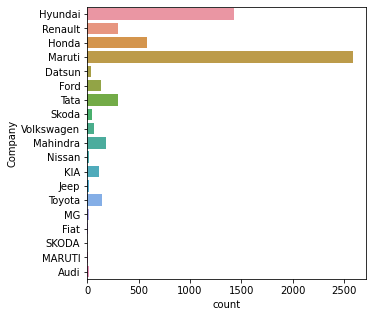

Maruti        2586
Hyundai       1424
Honda          582
Renault        297
Tata           296
Mahindra       183
Toyota         144
Ford           132
KIA            114
Volkswagen      61
Skoda           43
Datsun          34
MG              19
Nissan          16
Jeep            13
Audi            12
MARUTI           4
Fiat             2
SKODA            1
Name: Company, dtype: int64


In [36]:
plt.figure(figsize=(5,5))
sns.countplot(y='Company',data=df)
plt.show()
print(df['Company'].value_counts())

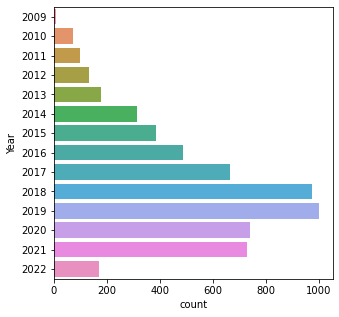

2019    1002
2018     973
2020     740
2021     729
2017     666
2016     487
2015     386
2014     315
2013     178
2022     170
2012     132
2011     101
2010      74
2009      10
Name: Year, dtype: int64


In [41]:
plt.figure(figsize=(5,5))
sns.countplot(y='Year',data=df)
plt.show()
print(df['Year'].value_counts())

## Bivariate Analysis


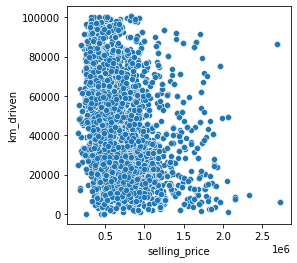

In [43]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='selling_price',y='km_driven',data=df)
plt.show()

### We can see, there are no direct relationship of both feature to each others.But the vehicle km_driven are in 0 to 100000 km those are having good price. And we can see maximum vehicle km_driven lies in this range.


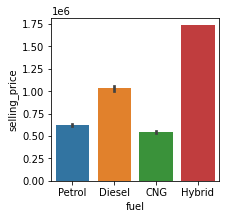

In [44]:
plt.figure(figsize=(3,3))
sns.barplot(x='fuel',y='selling_price',data=df)
plt.show()


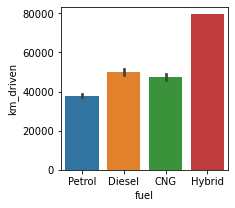

In [45]:
plt.figure(figsize=(3,3))
sns.barplot(x='fuel',y='km_driven',data=df)
plt.show()

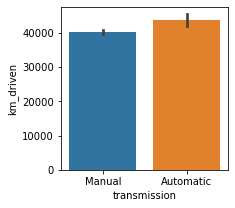

In [66]:
plt.figure(figsize=(3,3))
sns.barplot(x='transmission',y='km_driven',data=df)
plt.show()

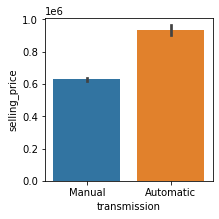

In [67]:
plt.figure(figsize=(3,3))
sns.barplot(x='transmission',y='selling_price',data=df)
plt.show()


### We can see, Automatic transmission cars are having higher selling price than Manual transmission cars.


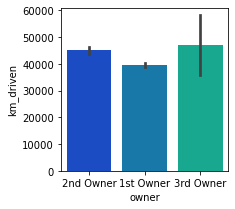

In [48]:
plt.figure(figsize=(3,3))
sns.barplot(x='owner',y='km_driven',data=df,palette='winter')
plt.show()

### We can see, 3rd owner cars are having maximum km_driven. It obviously because these are cars owned by multiple owner and they drive these cars more.1st owner cars are having less km driven.

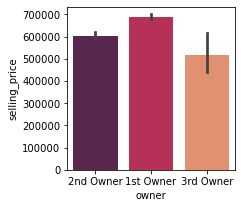

In [49]:
plt.figure(figsize=(3,3))
sns.barplot(x='owner',y='selling_price',data=df,palette='rocket')
plt.show()

### We can see, 1st owner cars are having maximum selling price tna others.


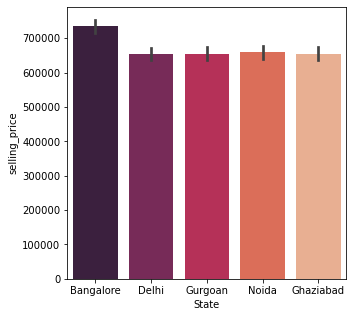

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='State',y='selling_price',data=df,palette='rocket')
plt.show()

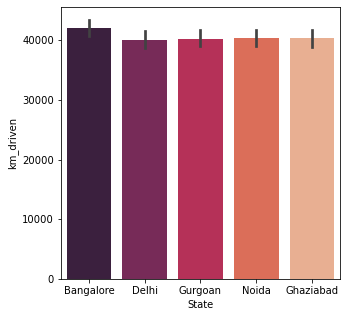

In [51]:
plt.figure(figsize=(5,5))
sns.barplot(x='State',y='km_driven',data=df,palette='rocket')
plt.show()

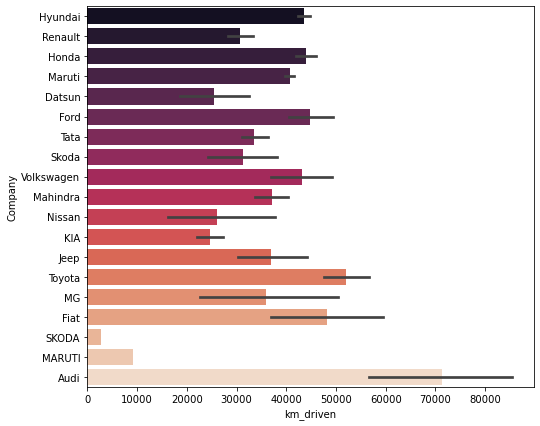

In [55]:
plt.figure(figsize=(8,7))
sns.barplot(y='Company',x='km_driven',data=df,palette='rocket')
plt.show()

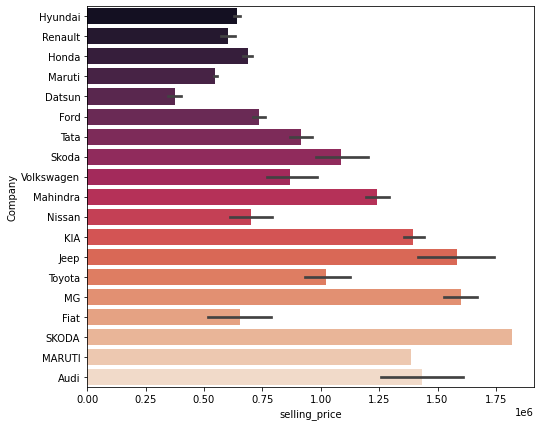

In [56]:
plt.figure(figsize=(8,7))
sns.barplot(y='Company',x='selling_price',data=df,palette='rocket')
plt.show()

## Multivariate Analysis


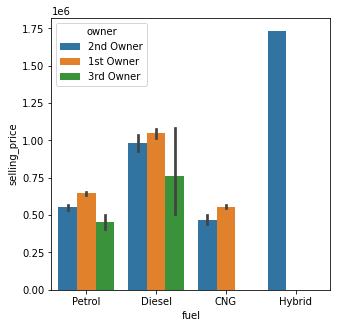

In [59]:
plt.figure(figsize=(5,5))
sns.barplot(x='fuel' ,y='selling_price',hue = 'owner',data=df)
plt.show()

### We can see,In all variants of fuel, 1st owner are having maximum cars selling price than others owner.


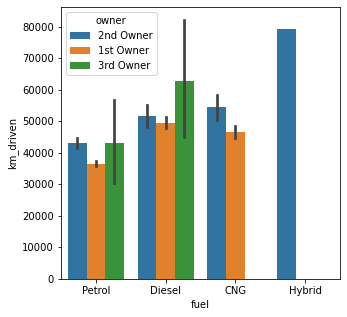

In [60]:
plt.figure(figsize=(5,5))
sns.barplot(x='fuel' ,y='km_driven',hue = 'owner',data=df)
plt.show()


### But in Diesel fuel cars, in which 3rd owner cars are having maximum km driven.


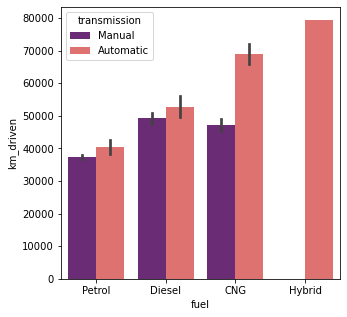

In [68]:
plt.figure(figsize=(5,5))
sns.barplot(x='fuel' ,y='km_driven',hue = 'transmission',data=df, palette='magma')
plt.show()

### We can see,In all fuel type, Automatic transmission cars are having maximum km_driven.


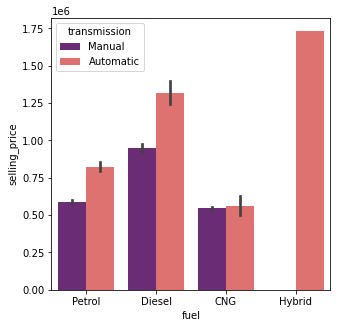

In [69]:
plt.figure(figsize=(5,5))
sns.barplot(x='fuel' ,y='selling_price',hue = 'transmission',data=df, palette='magma')
plt.show()

### We can see, In all fuel type,  Automatic transmission cars are having maximum selling price than others.


## Encoding Categorical Columns


In [70]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5963 entries, 0 to 5962
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5963 non-null   int32  
 1   Year           5963 non-null   int64  
 2   selling_price  5963 non-null   float64
 3   km_driven      5963 non-null   int32  
 4   fuel           5963 non-null   int32  
 5   transmission   5963 non-null   int32  
 6   owner          5963 non-null   int32  
 7   State          5963 non-null   int32  
 8   Company        5963 non-null   int32  
dtypes: float64(1), int32(7), int64(1)
memory usage: 302.8 KB


## Normal Distribution curve for every individual column


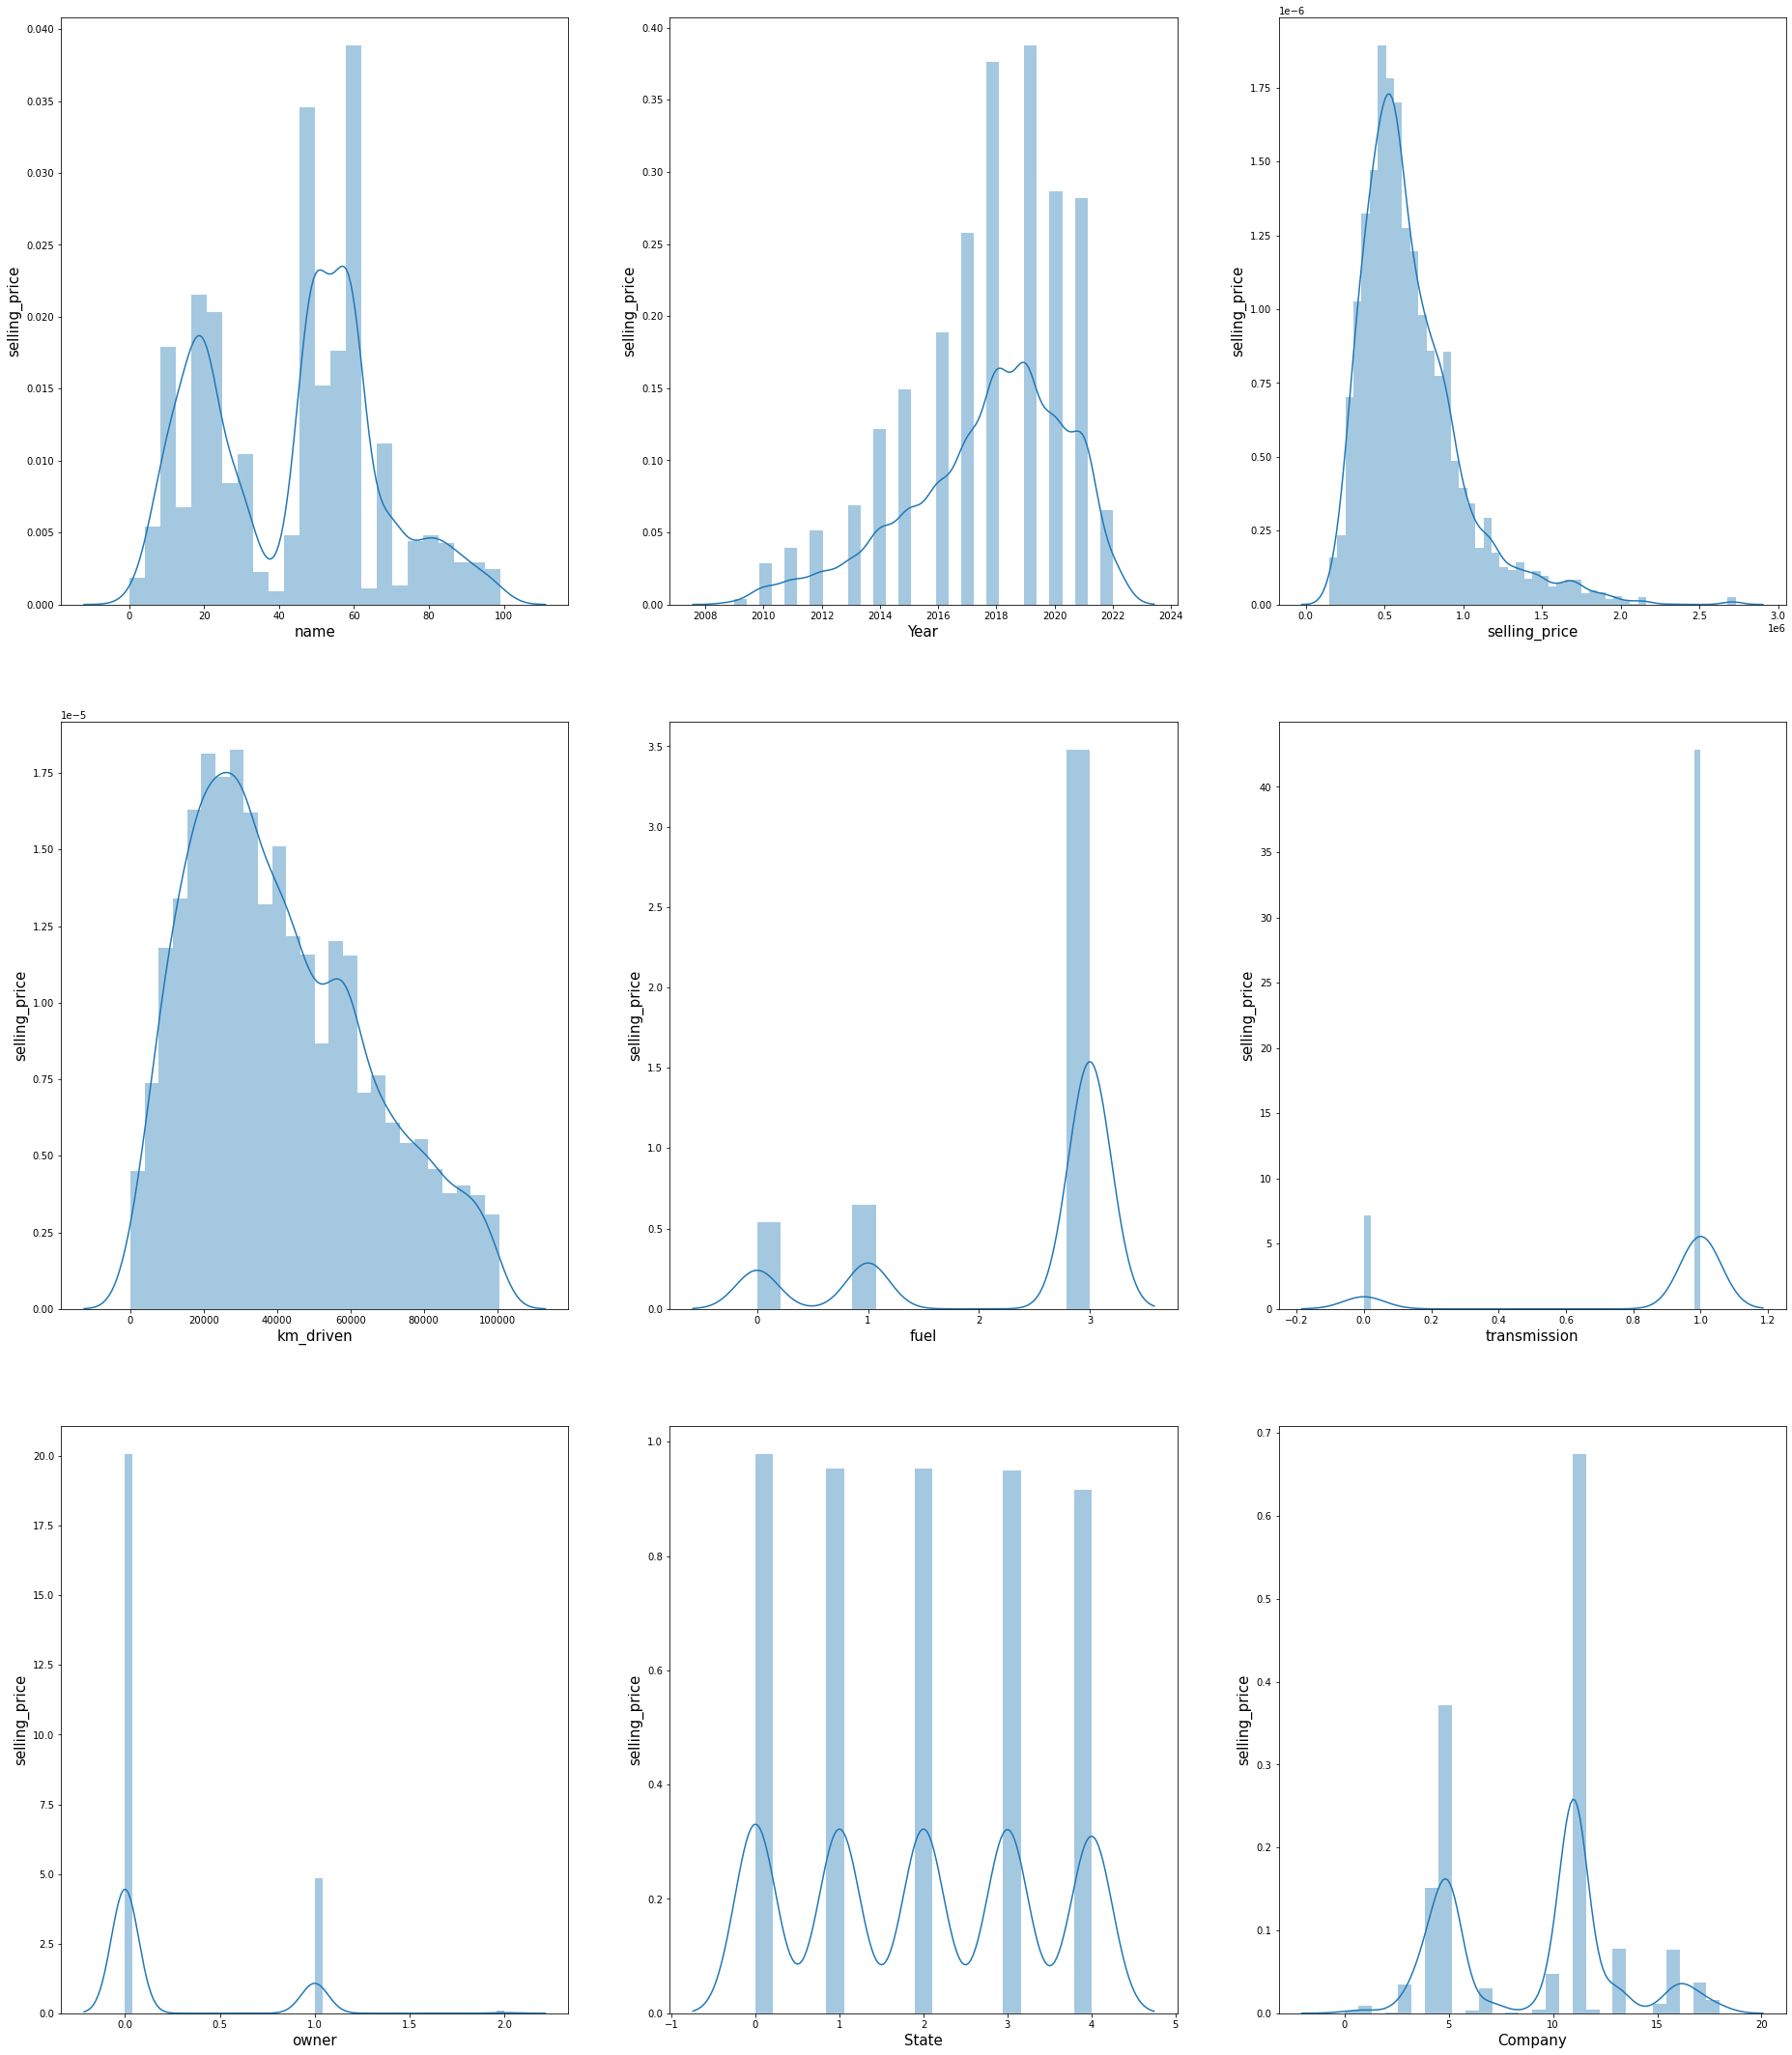

In [72]:
# let's visualize the data using distribution plot
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 9:
        ax = plt.subplot(3,3,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('selling_price',fontsize = 15)
    pn +=1
plt.show() 

### selling_price feature is indicating the presence of outliers.skewness is also present 


## ### Checking Outliers


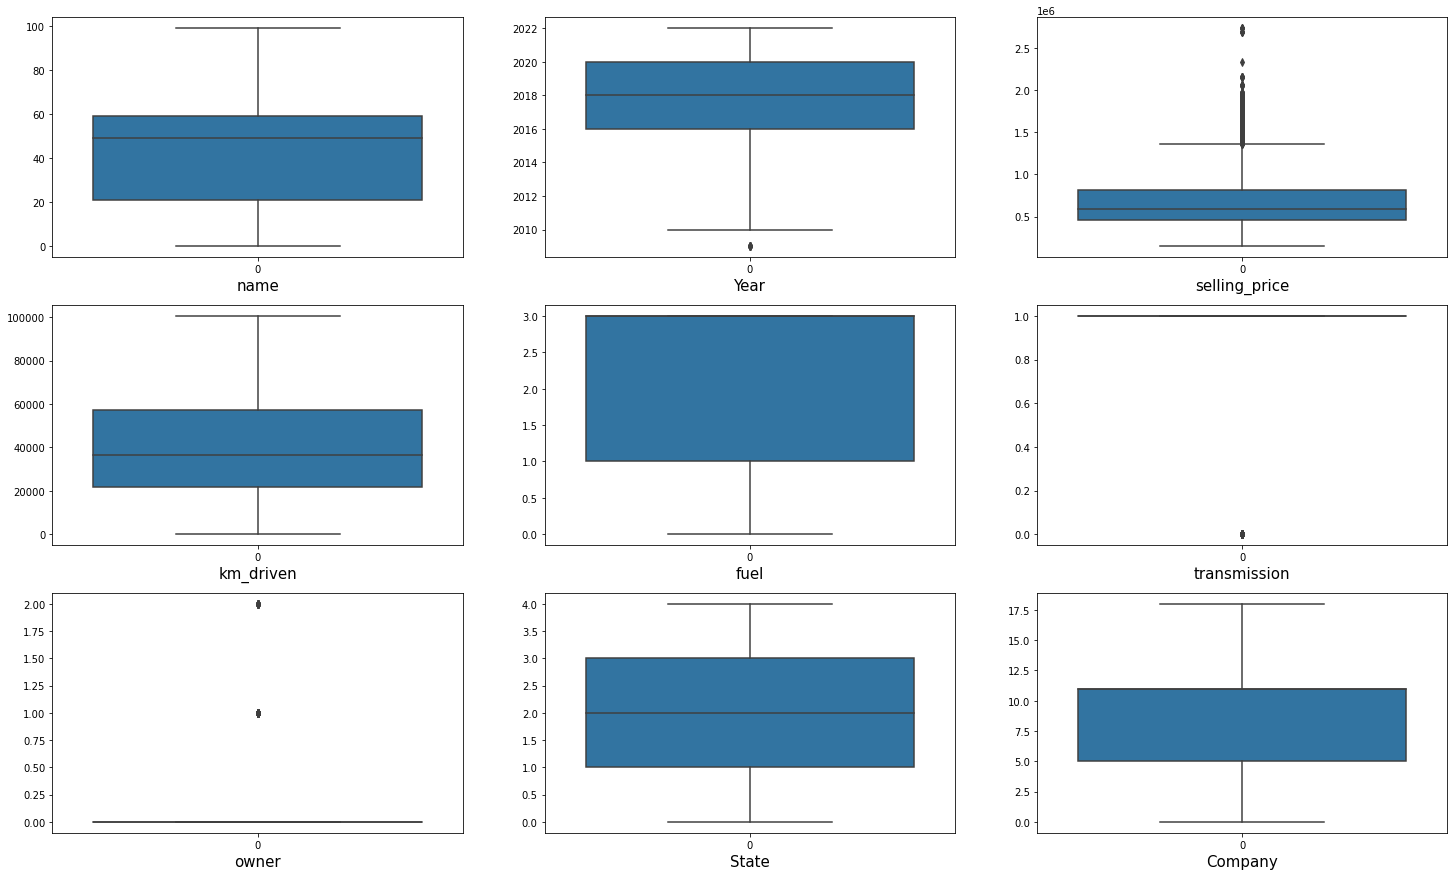

In [73]:
plt.figure(figsize=(25,15))
pn = 1
for col in df:
    if pn <=9:
        ax = plt.subplot(3,3,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation, selling_price feature is indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [74]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (5963, 9)
Shape of the dataframe after removing outliers:  (5807, 9)
Percentage of data loss post outlier removal:  2.6161328190508133


## Checking Correlation


In [75]:
df.corr()

,name,Year,selling_price,km_driven,fuel,transmission,owner,State,Company
name,1.000000,0.175792,-0.024604,-0.068349,-0.084479,0.001265,-0.042882,0.008647,0.981051
Year,0.175792,1.000000,0.502885,-0.468415,-0.234584,-0.028517,-0.196195,0.077784,0.202341
selling_price,-0.024604,0.502885,1.000000,-0.190745,-0.133703,-0.257093,-0.093958,-0.073057,-0.004145
km_driven,-0.068349,-0.468415,-0.190745,1.000000,-0.192643,-0.062320,0.089265,-0.018261,-0.072982
fuel,-0.084479,-0.234584,-0.133703,-0.192643,1.000000,-0.068627,0.057051,-0.093030,-0.080626
transmission,0.001265,-0.028517,-0.257093,-0.062320,-0.068627,1.000000,-0.041338,0.024005,0.001397
owner,-0.042882,-0.196195,-0.093958,0.089265,0.057051,-0.041338,1.000000,-0.073159,-0.054664
State,0.008647,0.077784,-0.073057,-0.018261,-0.093030,0.024005,-0.073159,1.000000,0.019498
Company,0.981051,0.202341,-0.004145,-0.072982,-0.080626,0.001397,-0.054664,0.019498,1.000000


In [77]:
# let's check the correation with selling_price
df.corr()['selling_price'].sort_values()


transmission    -0.257093
km_driven       -0.190745
fuel            -0.133703
owner           -0.093958
State           -0.073057
name            -0.024604
Company         -0.004145
Year             0.502885
selling_price    1.000000
Name: selling_price, dtype: float64

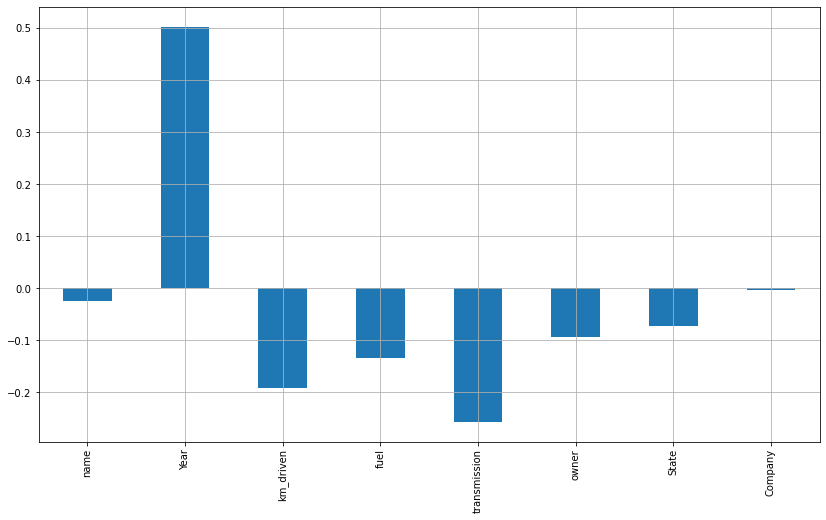

In [79]:
df.drop('selling_price',axis=1).corrwith(df.selling_price).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

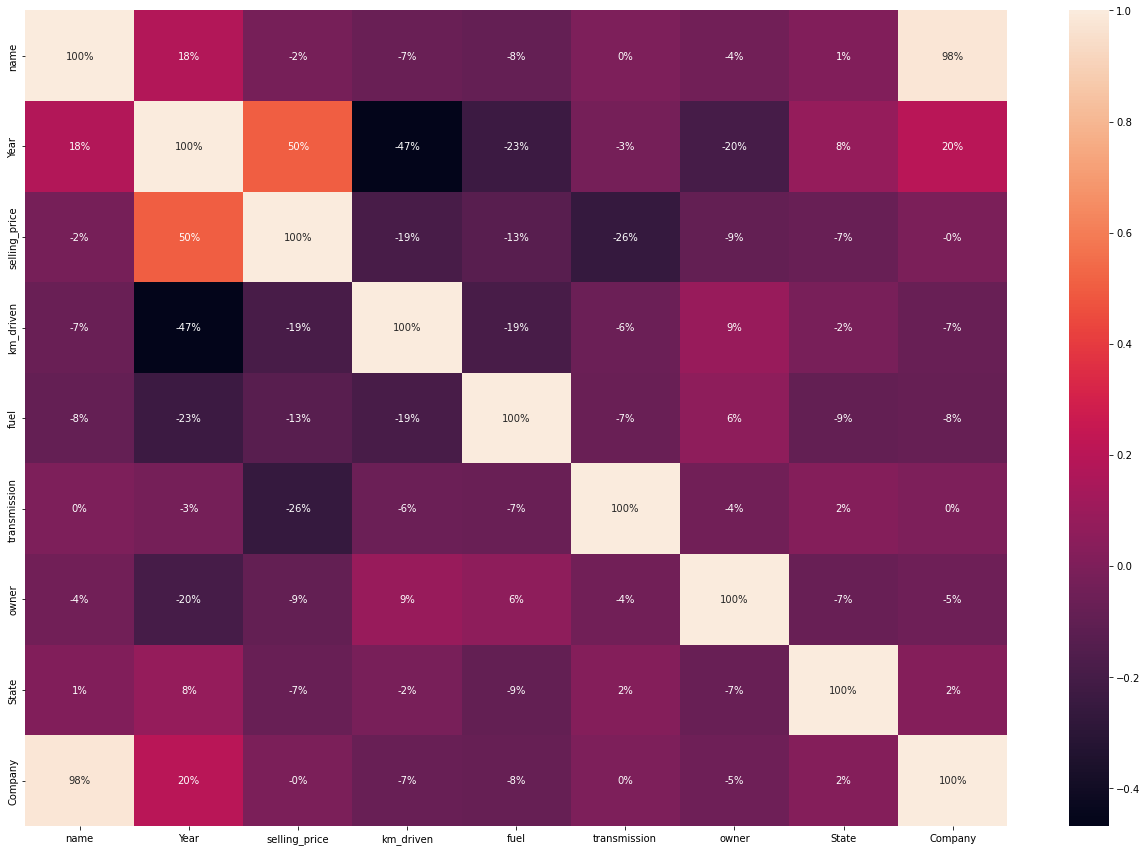

In [80]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

### Obserrvations:-
- name,km_driven,fuel,transmission,owner are negatively correlated with target.
- year and company are positively correlated with target variable
- name is highly correlated with company
- maximum correlation : year
- minimum correlation : company

In [81]:
df.drop(columns='name',inplace=True)

In [82]:
df.shape

(5807, 8)

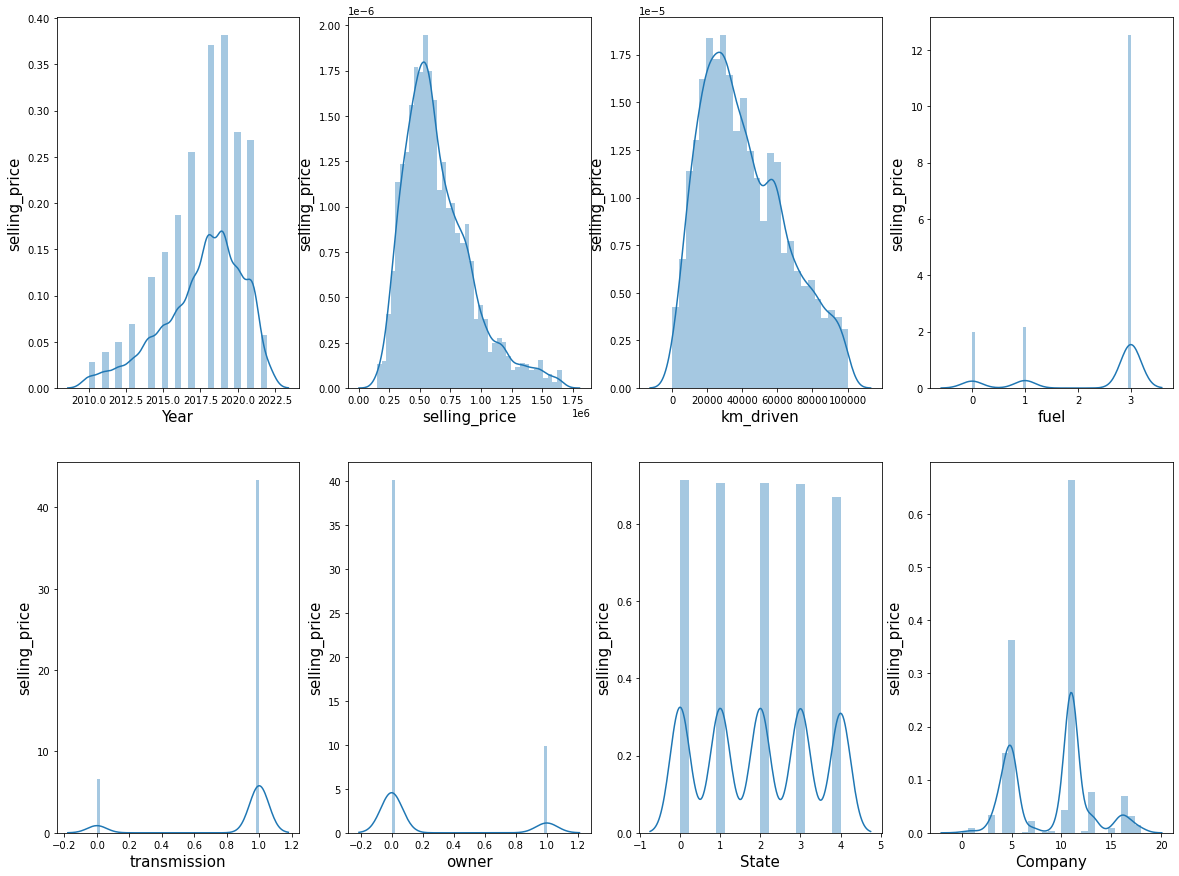

In [85]:
# let's visualize the data after removing outliers
plt.figure(figsize=(20,15))
pn = 1
for col in df:
    if pn <= 8:
        ax = plt.subplot(2,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('selling_price',fontsize = 15)
    pn +=1
plt.show()  

## Skewness

In [86]:
df.skew()

Year            -0.734648
selling_price    1.049431
km_driven        0.543215
fuel            -1.339233
transmission    -2.173863
owner            1.528115
State            0.014678
Company          0.049193
dtype: float64

## Dividing data in features and label


In [87]:
x = df.drop('selling_price',axis = 1)
x.head()

,Year,km_driven,fuel,transmission,owner,State,Company
0,2015,41831,3,1,1,0,5
1,2013,98078,3,1,1,0,5
2,2017,20002,3,0,0,0,13
3,2012,76807,3,1,0,0,5
4,2015,57094,3,1,0,0,4


In [88]:
y=df['selling_price']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [89]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Year,km_driven,fuel,transmission,owner,State,Company
0,-1.021517,0.182424,0.573958,0.390106,2.022225,-1.494636,-1.040178
1,-1.723766,1.981164,0.573958,0.390106,2.022225,-1.494636,-1.040178
2,-0.286525,-0.835441,0.573958,-2.563407,-0.494505,-1.494636,1.007906
3,-2.063060,1.379275,0.573958,0.390106,-0.494505,-1.494636,-1.040178
4,-1.021517,0.746771,0.573958,0.390106,-0.494505,-1.494636,-1.337787
5,-2.063060,0.417375,0.573958,0.390106,2.022225,-1.494636,-1.040178
6,-1.021517,0.275253,0.573958,0.390106,2.022225,-1.494636,-1.040178
7,-2.063060,0.973262,0.573958,0.390106,-0.494505,-1.494636,0.534917
8,-0.658206,-0.205557,0.573958,0.390106,-0.494505,-1.494636,-1.337787
9,-0.286525,0.661675,0.573958,0.390106,2.022225,-1.494636,-1.040178


In [90]:
pd.DataFrame(x).skew().sort_values()

transmission   -2.173863
fuel           -1.175127
Year           -0.596337
State          -0.170478
Company        -0.116035
km_driven      -0.076053
owner           1.528115
dtype: float64

### Every value will be reduced after transformation


In [91]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.02151731,  0.1824239 ,  0.57395835, ...,  2.02222533,
        -1.49463635, -1.04017824],
       [-1.72376594,  1.98116357,  0.57395835, ...,  2.02222533,
        -1.49463635, -1.04017824],
       [-0.28652468, -0.83544108,  0.57395835, ..., -0.49450474,
        -1.49463635,  1.00790554],
       ...,
       [-1.37664389,  1.71083219,  0.57395835, ..., -0.49450474,
         0.09724942,  0.53491713],
       [ 0.09371432,  0.65604001,  0.57395835, ..., -0.49450474,
         0.09724942,  2.1185138 ],
       [ 0.09371432,  0.8217872 , -1.63515182, ..., -0.49450474,
         0.09724942,  0.53491713]])

## Final features Multi-Collinearity Check using VIF**


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Year,1.678238
1,km_driven,1.584759
2,fuel,1.255545
3,transmission,1.016900
4,owner,1.047294
5,State,1.015312
6,Company,1.047485


### If VIF > 5, It means multicollinearity is present.We can see, there is no MultiCollinearity exists in datasets Based on ANOVA F scores.


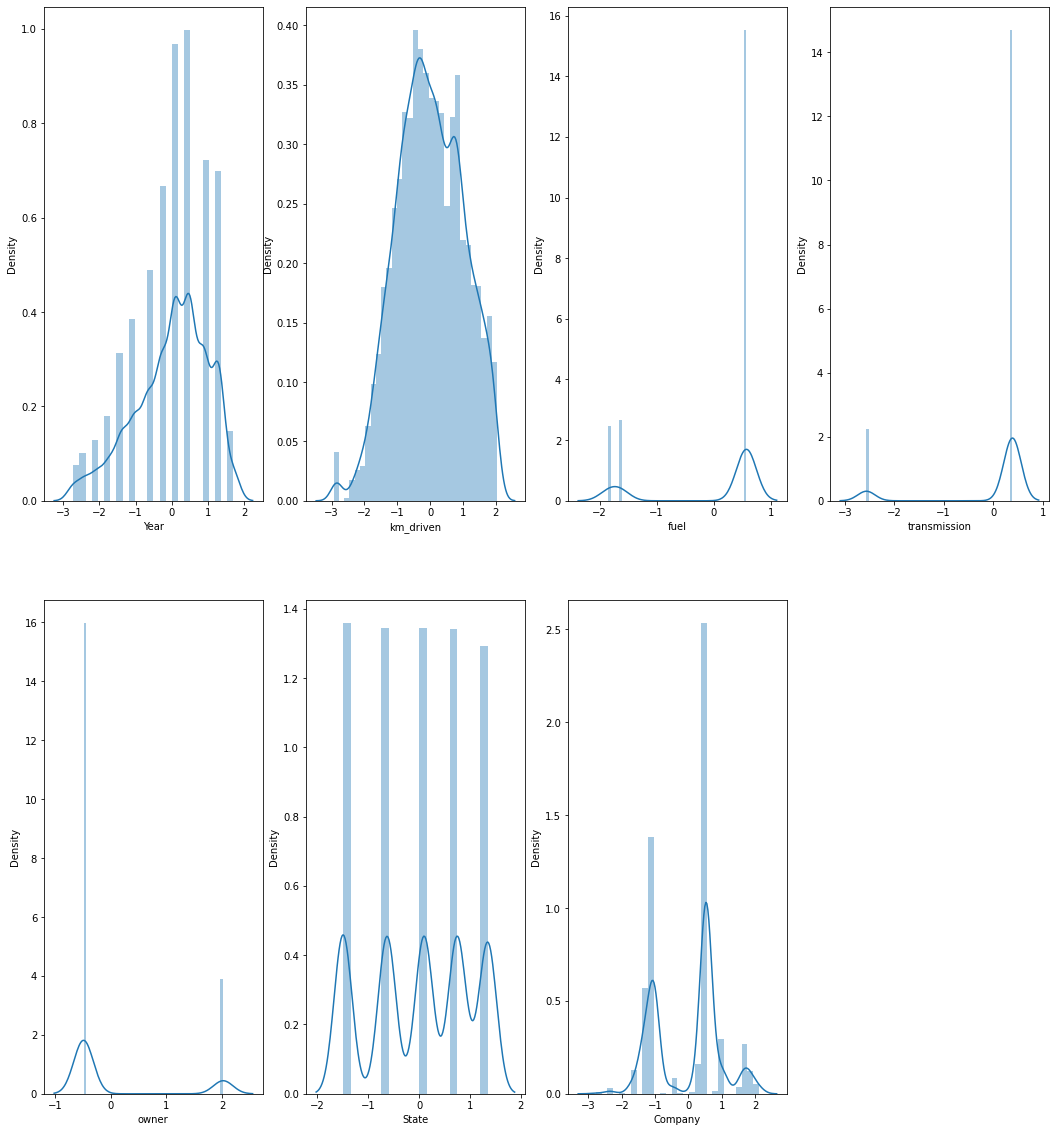

In [94]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'selling_price' is continuous.


### Finding the best Random state and maximum accuracy

In [128]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [129]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    xgb=XGBRegressor()
    xgb.fit(X_train, Y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8801160050278073 on Random State 291


**Splitting the data into Training and Testing**


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=176)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [130]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=291)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression


In [99]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 219021.4521422567
R2 Score is: 38.79649596467679
Cross Validation Score: 29.940331989824543
R2 Score - Cross Validation Score is 8.856163974852244


**Ridge Regression**

In [100]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 219075.80132901252
R2 Score is: 38.766117448334256
Cross Validation Score: 29.999091059997195
R2 Score - Cross Validation Score is 8.767026388337062


## Decision Tree Regressor


In [113]:
# Decision Tree Regressor
model=DecisionTreeRegressor()
reg(model, x, y)

RMSE Score is: 120683.9298545133
R2 Score is: 80.8699466977909
Cross Validation Score: 80.01269329430244
R2 Score - Cross Validation Score is 0.8572534034884569


## Random Forest Regressor


In [108]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 235944.2060308684
R2 Score is: 29.924221049103174
Cross Validation Score: 27.991512622955845
R2 Score - Cross Validation Score is 1.9327084261473289


## KNeighbors Regressor


In [111]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 233323.9279143221
R2 Score is: 28.495092266268117
Cross Validation Score: 26.44030284281976
R2 Score - Cross Validation Score is 2.054789423448355


## Support Vector Regression


In [112]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 283436.7992099225
R2 Score is: -5.518780301024129
Cross Validation Score: -6.006976141942513
R2 Score - Cross Validation Score is 0.48819584091838397


## XGBOOST

In [131]:
model = XGBRegressor()
reg(model, x, y)

RMSE Score is: 100807.65787446655
R2 Score is: 88.01160050278072
Cross Validation Score: 81.3434829421006
R2 Score - Cross Validation Score is 6.66811756068013


 ###  as per my observation , I choose Decision Tree as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING


In [133]:
xgb=XGBRegressor()

In [134]:
param = {'learning_rate':[0.1,0.2,0.3],
        'n_estimators':[150,200,300],
        'max_depth':[5,10,15],
        'min_child_weight':[7,9,11],
        'gamma':[0,0.1,0.2,0.3],
        'colsample_bytree':[0.3,0.4,0.5]}

In [139]:
grd = GridSearchCV(xgb,param_grid = params)
grd.fit(X_train,Y_train)

[13:36:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:36:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:36:33] WAR

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    criterion='squared_error',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.30000001...
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_features=5,
                                    max_leaf_nodes=5, max_leaves=0,
                                    min_child_weight=1, min_samples_leaf=2,
                       

In [140]:
xgb = grd.best_estimator_
xgb.fit(X_train,Y_train)

[13:36:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             criterion='squared_error', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_features=5,
             max_leaf_nodes=5, max_leaves=0, min_child_weight=1,
             min_samples_leaf=2, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0, ...)

In [141]:
pred = xgb.predict(X_test)
r2_score(Y_test,pred)*100

84.44124029266948

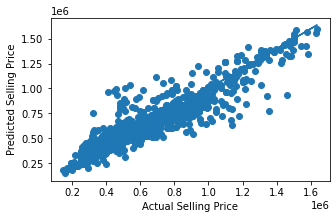

In [142]:
plt.figure(figsize=(5,3))
plt.scatter(x=Y_test,y=pred)
plt.plot(Y_test,Y_test)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

# save the final model


In [143]:
import joblib
joblib.dump(xgb,'Car price.pkl')

['Car price.pkl']

## Loading The Model


In [144]:
mod=joblib.load("Car price.pkl")

## Predicting the Selling Price of car


In [145]:
print(mod.predict(x))


[574500.9  369258.8  522667.84 ... 356056.47 562145.6  739554.44]


In [146]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,5.745009e+05,580000.0
1,3.692588e+05,315000.0
2,5.226678e+05,420000.0
3,3.363448e+05,322000.0
4,6.758348e+05,726000.0
5,3.415138e+05,330000.0
6,6.384839e+05,687000.0
7,2.569552e+05,344000.0
8,6.369980e+05,505000.0
9,6.709511e+05,594000.0


## Conclusion
- The main component on which the price of a car depends is on cars name, km_driven and the mileage on the car etc.
- The price also depends on which city the car was registered, as some cities have different tax rates and restrictions.